In [2]:
import numpy as np
import seaborn as sns
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold #, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [20]:
data_path_train = os.path.join(os.getcwd(),'Data', 'PartA', '20ng_train.csv')
data_path_test = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
data_path_labels = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_labels.csv')

ng_train = pd.read_csv(data_path_train, delimiter = ',', compression ='bz2')
ng_test = pd.read_csv(data_path_test, delimiter = ',', compression ='bz2')
ng_labels = pd.read_csv(data_path_labels, delimiter = ',', compression ='bz2')

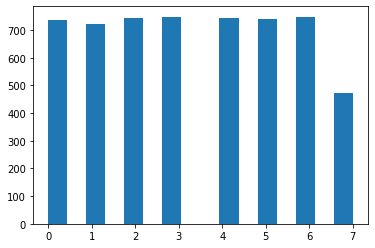

In [4]:
# 1.1 http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_SummarizingData/BS704_SummarizingData_print.html
# dimensionality, data ranges, feature and class distribution
# anything out of ordinary
# typical features like?

X_train = ng_train.drop('class', axis = 1)
y_train = ng_train['class']

#X_test.head(50)
#X_test.describe()#.iloc[1].sort_values()
#X_test.info() # 5648 entries, 1000 features (word TF-IDF), 

#unique, counts = np.unique(y_train, return_counts=True)
#plt.bar(unique, counts)
#plt.title('Class Frequency')
#plt.xlabel('Class')
#plt.ylabel('Frequency')
#plt.show()

#kmeans = KMeans(n_clusters=5, random_state=1000, n_init = 50).fit(X)
#kmeans.predict(X)

In [4]:
#1.2 Compare testing set with training set
X_test = ng_test.drop('class', axis = 1)
y_test = ng_test['class']
#X_test.head(5)
X_test.describe()

# sizes
#X_test.count

# feature distributions

# repercussions?

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.006194,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.041170,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,1.000000,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114


1.3 Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature?

In [26]:
#not_null_accept = X_train['accept'][X_train['accept']>0]
#sns.distplot(non_null_accept)

#not_null_words = X_train.nonzero()
#not_null_words
#sns.distplot(not_null_words)

2.1 The K-Means algorithm is non-deterministic. Explain why this is, and how the final model is selected in the SKLearn implementation of KMeans.

In [28]:
# 2.2 One of the parameters we need to specify when using k-means is the number of clusters
# What is a reasonable number for this problem and why?


2.3 We will use the Adjusted Mutual Information (AMI) i.e. adjusted_mutual_info_score (https://scikit-learn.org/stable/modules/clustering.html#mutual-info-score) between the clusters and the true (known) labels to quantify the performance of the clustering. Give an expression for the MI in terms of entropy. In short, describe what the MI measures about two variables, why this is applicable here and why it might be difficult to use in practice. Hint: MI is sometimes referred to as Information Gain: note that you are asked only about the standard way we defined MI and not the AMI which is adjusted for the size of the domain and for chance agreement.

https://en.wikipedia.org/wiki/Mutual_information

https://thuijskens.github.io/2017/10/07/feature-selection/

In [7]:
# 2.4
amis = []
ks = list(range(2,13))
for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=1000, n_init=50).fit(X_train)
    y = kmeans.predict(X_train)
    amis.append(adjusted_mutual_info_score(y_train, y, average_method='max'))

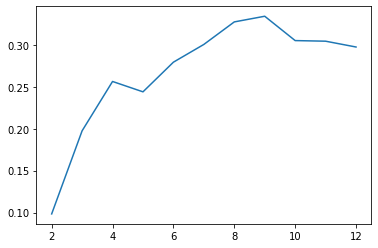

In [9]:
plt.plot(ks, amis)
plt.show()

In [29]:
kmeans4 = KMeans(n_clusters=4,random_state=1000, n_init=50).fit(X_train)
y4 = kmeans4.predict(X_train)

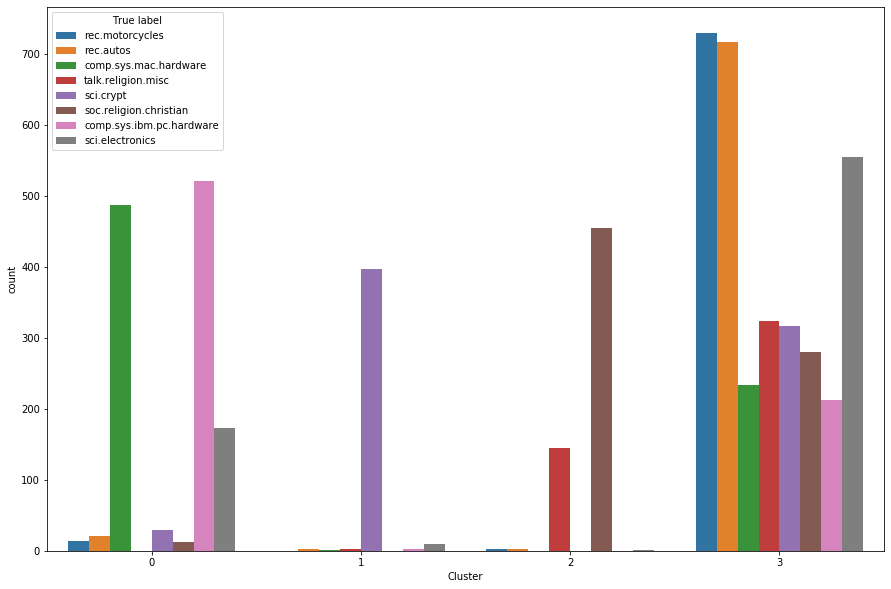

In [105]:
# 2.6
y_train_labels = list(map(lambda x: ng_labels.iloc[x].iloc[0], y_train))
assignments = pd.DataFrame(list(zip(y4, y_train_labels)), columns = ['Cluster', 'True label'])
plt.figure(figsize=(15,10))
sns.countplot(data=assignments, x='Cluster', hue='True label')

3.1

3.2

3.3

In [57]:
# 3.4
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
f1s = []
for train_index_array, test_index_array in skf.split(X_train, y_train):
    train_instances = X_train.iloc[train_index_array]
    train_classes = y_train.iloc[train_index_array]
    
    test_instances = X_train.iloc[test_index_array]
    test_classes = y_train.iloc[test_index_array]
    
    lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0)
    lr.fit(X=train_instances, y=train_classes)
    predictions = lr.predict(test_instances)
    f1s.append(f1_score(predictions, test_classes, average='macro'))

In [62]:
print("Average F1 score: {}".format(np.mean(f1s)))
print("Standard deviation of F1 score: {}".format(np.std(f1s)))

Average F1 score: 0.6689909262264606
Standard deviation of F1 score: 0.016922045421971926


In [100]:
# 3.5 We will now optimise the Regularisation parameter C using cross-validation.
exponents = np.arange(-4, 5.5, 0.5)
Cs = list(map(lambda x: 10**x, exponents))

f1s_average_training = []
f1s_average_validation = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for reg_param in Cs:
    f1s_training = []
    f1s_validation = []
    
    for train_index_array, test_index_array in skf.split(X_train, y_train):
        train_instances = X_train.iloc[train_index_array]
        train_classes = y_train.iloc[train_index_array]

        test_instances = X_train.iloc[test_index_array]
        test_classes = y_train.iloc[test_index_array]

        lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C=reg_param)
        lr.fit(X=train_instances, y=train_classes)
        
        predictions_training = lr.predict(train_instances)
        predictions_validation = lr.predict(test_instances)
        
        print(f1_score(predictions_training, train_classes, average='macro'))
        print(f1_score(predictions_validation, test_classes, average='macro'))
        
        f1s_training.append(f1_score(predictions_training, train_classes, average='macro'))
        f1s_validation.append(f1_score(predictions_validation, test_classes, average='macro'))
    
    f1s_average_training.append(np.mean(f1s_training))
    f1s_average_validation.append(np.mean(f1s_validation))

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.1024226011544432
0.11191989687055477


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.10374574398125595
0.10734136959934856


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.10619636258245657
0.09181196908730918


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.10876344357726073
0.09897488440521227


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.10665951766942619
0.1205421580707622


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.10826471151584985
0.10371837183718371


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.10993194953934225
0.09335783846387435


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.11779194131374239
0.11220933690157597


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.10430240889374996
0.09848921785382421


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.10430610181362102
0.10430019524459065


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.20163321385117955
0.1897147728406767


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.19960174029327857
0.1733220050119245


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.21433696125461774
0.19519287997275944


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.23109688005592022
0.19692100852390518


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.22612857547910598
0.23340082238542914


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.2280869539743231
0.2279224872504616


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.22343321290310075
0.24376933452531185


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.2284886766820488
0.2094237987987988


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.19927203726094214
0.19161561689366904


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.19644882461104135
0.2080888382700442
0.4145745043584269
0.3960083396308775


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.4147223337002372
0.3880572357820554


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.42366185304250203
0.3960319824378451
0.41975439723417574
0.39616393157844276


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.4182911233965301
0.41329613328585585


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.4188602125777168
0.41687898617413743
0.42051840672495233
0.4035471441402567


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.41703059771237616
0.37976184867374513


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.41522083912405233
0.390335932114042


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.4214349673410067
0.398140052738129


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5859061904939685
0.5293615654371469


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5807345494418665
0.5619279498420746


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5891606615222649
0.5394895821516474


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5829808150336983
0.5506613950791185


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5844369743565772
0.5673886595152886


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5862743718494596
0.5563612036853327


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5822499947068178
0.5364445125749968


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5792710454733505
0.5658070098381891


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5811097723491592
0.5470628212871252


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5837467426681825
0.5395141961700706


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6310517834323053
0.5698106652650958


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6291636036505507
0.5887779499545681


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6293733499214982
0.5880267022795866


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.626273801050564
0.614197436066359


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6272914141278079
0.597483340966616


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6283071359438557
0.595615525013359


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6279888517382339
0.5793741854539458


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6288714907150568
0.593275116763507


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6277660863314714
0.5901640875528549


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6308950654805408
0.5864377181731821


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6435354058762255
0.5820171076508234


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.64238588280426
0.595362922677692


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6418640382857488
0.5948035186936442


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.641006542244571
0.6209483285817883


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6405478457752856
0.6169924429179983


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6379060880875638
0.6046480443313


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6443227461806563
0.5966532250045389


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6401881507576336
0.593849702017816


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.642315302713024
0.6025446941101308


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.6401898900660449
0.6001239041561899
0.6775794943149307
0.6061943290609454
0.6800701988326936
0.6204959114476044
0.6856630624801523
0.6313475928395981
0.6819472406236973
0.6570972833489288
0.6843894111048822
0.627500780411401
0.690528674930461
0.619260909384509
0.6864688123689584
0.6143972769416087
0.6838650396582754
0.6226962601960742
0.6870627517050357
0.6236666644174043
0.688725147775041
0.6090042056830528
0.7628065262087975
0.656111318090433
0.7549282045587606
0.6730994575871585
0.7588207106299727
0.6624086540127687
0.7570054305449793
0.6819520200192044
0.753051758072624
0.6573051715760344
0.7597173406373576
0.6634621982641966
0.7612028304925255
0.6687727081197135
0.7600130691544276
0.669519821276404
0.7581869712265313
0.6669915988404687
0.7617606988512715
0.6333055120591435
0.82145358224146
0.6577444525394786
0.817372650213811
0.6746667410935314
0.816314203752192
0.6841787998742919
0.8187865530664096
0.6925705429490217
0.8146260166855339
0.6524624879755397
0.8166379174518874
0.67

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8680185716931659
0.642267196066367


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.865071145353222
0.6711463696349151


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8637061811828726
0.6922645958054483


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8669204604288712
0.6658011475785686


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8673076137891493
0.6506640992183041


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8659786479904672
0.6651086764200245


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8664206508922687
0.6691390070363086


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8676672743416165
0.6667651980550473


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8662834500327508
0.6557977464140836


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8646315027545911
0.6396618574160579


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9145429321267022
0.6314494473599698


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.916332204620316
0.6734206533450746


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9169985136730592
0.6720856135580502


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9169885884423882
0.633449796675182


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9137190932237715
0.6472046094011779


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9162866656245463
0.6511398087552195


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9194494218766407
0.6603977389253798


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.91860252766372
0.6562432707800341


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9174504102915109
0.646426576540524


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9169734732336657
0.636855498412134


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.947170982159997
0.6159705877315429


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9513310585612398
0.6534200704092025


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9467162478200193
0.648327189322849


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9471226324760327
0.6207030980896998


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9477633305645248
0.6234780149210011


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9500724887006102
0.6408068676211511


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9526096459421618
0.6384044760038643


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9499315703125453
0.648138357258166


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9515309264587746
0.6264998458241142


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9511899841187479
0.6361791174012214


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9624087401485419
0.6044647996847504


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9616162692988095
0.6476422773719899


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9621012525333812
0.6457111905597474


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9615815370738703
0.6103254953709067


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9622755806373274
0.6260307238079306


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9641016821104871
0.635076961495375


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9645275768722106
0.6348564796724585


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9639348038663101
0.6441673200868665


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9636918447235214
0.6175960676523824


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9624605419644903
0.6407101411409406


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9648678927291869
0.609528486075644


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9631144038192458
0.6620092063059299


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9660577987482943
0.6313147166052406


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9648830417952187
0.6129391834022069


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9664172800882229
0.6203804949939116


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.967241069242241
0.6351303807775165


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9677784519776463
0.6353466795690664


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9665855058389379
0.636262634888633


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9676301435066907
0.6183052422819739


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9660652969538726
0.6291809015416707


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9667900774665776
0.6155664871025381


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9667779143784324
0.6514171968334028


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9670246218613927
0.6288827375391844


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9682936638741017
0.5986237277466132


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9670632788989715
0.6200555067733963


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9680552728444709
0.6424293280331417


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9694060380870256
0.6300505652232189


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9675308362819808
0.6332871362499868


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9690029220237718
0.6165322625356124


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9676250583296784
0.628669351083633


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9671903608903569
0.6159392834165345


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9667944624705138
0.6478178610027925


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9674575815975088
0.6324617984648209


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9682665326079729
0.6014093862656562


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9678212467429568
0.6101416164388411


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9682415546586547
0.6424855897304687


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9693663626274541
0.6339339456335359


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9675300765690291
0.6343401735778091


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.969015258158528
0.6140647259208811


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9677987470113616
0.6280790623639891


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.967569155237956
0.6158985998521395


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9664725245524982
0.6360847805482817


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9665033780196035
0.6330390193824853


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9688774587985701
0.6059196664448092


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9678094331627445
0.6095860147964409


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9684342381348165
0.6201889176351485


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9695867818137562
0.6365737064482613


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9677364318051108
0.6306054160304906


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9694152939780698
0.6130799785155714


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9684059920306334
0.6119415404947723


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9672088518268123
0.6155519137594494


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9667197955080935
0.6435736849231615


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9669123994567154
0.6216627484857764


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9686827593200764
0.5966843284604604


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9680176167528474
0.607481325279866


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9686468711266332
0.6334399037030256


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9696285399831551
0.6398324044468755


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9677307046540954
0.6341004460469435


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9693926010168288
0.6162968242857015


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9683767914450491
0.6174100473109101


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.967103733266433
0.6165478599828542


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9673619718246365
0.6380116462967762


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9668969983961277
0.6274543922704935


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9688998835058441
0.5979298787022466


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.968018160754023
0.6030883410739901


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9688210171998886
0.6235056746938166


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.969629078914491
0.6380683592141484


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9677362454606292
0.6298517947390546


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9692094637698035
0.6126395762342974
0.9681985358220462
0.6097904767044537


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


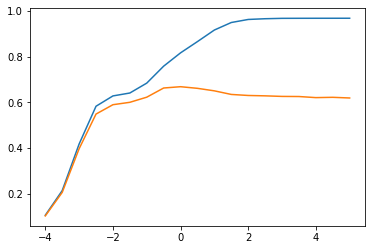

In [101]:
plt.plot(exponents, f1s_average_training)
plt.plot(exponents, f1s_average_validation)
plt.show()

In [ ]:
# Question B
data_path_bristol_day_aligned = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_DayAligned.csv')
data_path_bristol_site_aligned = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_SiteAligned.csv')
data_path_bristol_exploratory = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_Exploratory.csv')

bristol_day_aligned = pd.read_csv(data_path_bristol_day_aligned, delimiter = ',', compression ='bz2')
bristol_site_aligned = pd.read_csv(data_path_bristol_site_aligned, delimiter = ',', compression ='bz2')
bristol_exploratory = pd.read_csv(data_path_bristol_exploratory, delimiter = ',', compression ='bz2')